# Working with AnnData object using scanpy in Single Cell RNASeq Data Analysis

In this tutorial, we will learn:

1) Downloading datasets from 10X genomics

2) Loading the gene count matrix (cell ranger output) into AnnData object

3) What:

    - is AnnData object? Different components of AnnData object
    
    - Section 1: Summary of AnnData object
    
    - Section 2: Inspection of newly created AnnData object

4) Section 3: Quality Control on AnnData object

5) Section 4: Filtering cells and genes

6) Section 5: Normalization of data 

7) Section 6: Finding Highly variable genes

8) Section 7: Scaling the data

9) Section 8: Perform PCA analysis

10) Section 9: Finding Neighbors

11) Section 10: Running UMAP and Visualization

In [2]:
!pip install scanpy

In [3]:
# Main packages
import scanpy as sc
import pandas as pd


# other packages
import os


#package.module.function()

# Figure parameters
sc.settings.set_figure_params(dpi=80, facecolor="white")
sc.logging.print_header()

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.20.1 scipy==1.9.3 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.12.2 pynndescent==0.5.8


In [4]:
#https://scanpy.readthedocs.io/en/stable/api.html#module-scanpy.datasets
# Peripheral Blood Mononuclear Cells (PBMC)

adata = sc.datasets.pbmc3k()
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

##### File description

10X datasets: https://www.10xgenomics.com/resources/datasets

Explanation about file formats: https://support.10xgenomics.com/single-cell-gene-expression/software/pipelines/latest/output/matrices

'barcodes.tsv' - Cells barcodes (column)

'genes.tsv' - Genes ID and name (rows)

'matrix.mtx' - Gene Expression matrix (values)

In [5]:
# https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz

# Save my Windows folder location into variable using raw string notation which considers as literal characters
filt_folderpath = r"C:/Users/65861/Documents/Work/SingleCell/Python_R_SingleCell/Singlecell/data/filtered_gene_bc_matrices/hg19/"
print(filt_folderpath)

# Check directory contents
print(os.listdir(filt_folderpath))

# Load files into AnnData object
adata = sc.read_10x_mtx(filt_folderpath, var_names = 'gene_symbols',cache=True)

C:/Users/65861/Documents/Work/SingleCell/Python_R_SingleCell/Singlecell/data/filtered_gene_bc_matrices/hg19/
['barcodes.tsv', 'genes.tsv', 'matrix.mtx', 'Screenshot 2023-01-10 212000.png']


### What is AnnData?

AnnData is a Python object used to represent single-cell RNA-seq data in the anndata package. The anndata package is a toolkit for analyzing and working with single-cell RNA-seq data, and is built on top of the popular pandas and numpy libraries.

One of most powerful feature of AnnData object is:  it makes users to easily access and manipulate different types of data from single object.

### Components of AnnData object

`---> X`

The gene expression data is stored as a matrix `(X)`, with rows representing genes and columns representing cells. The data can be either dense (all values are stored in memory) or sparse (only non-zero values are stored in memory).

`---> obs and var`

The AnnData object stores various annotations about the data, such as gene names and IDs, cell barcodes and metadata, and cluster assignments. These annotations are stored in pandas dataframes called `var` (for gene annotations) and `obs` (for cell annotations).

`---> obsm, varm and uns`

The AnnData object can also store the results of various analysis steps, such as dimensionality reduction or clustering. The results such as dictionaries in the form of  unstructured data are stored in the `uns`. Information such as PCA, t-SNE, or UMAP coordinates which are all structured data associated with each cells are stored in `obsm` dataframe. Whereas `varm` dataframes stores additional information in the form of structured data associated with each genes. 

`---> obsp and varp`

`obsp` dataframe contains rows for each cell pair and columns for each structured data element such as distances, similarity score or any other measures that are calculated based on both cells. Whereas the `varp` dataframe contains rows for each gene pair and columns for each structured data element, such as the pairwise similarity or distance between genes, the functional enrichment of gene pairs or any other measures that are calculated based on both genes.

### Section 1: Summary of AnnData object

In [6]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [7]:
print(adata.shape)

(2700, 32738)


In [11]:
print(adata.obs.info())
print('')
print('##########################################')
print('')
print(adata.var.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2700 entries, AAACATACAACCAC-1 to TTTGCATGCCTCAC-1
Empty DataFrameNone

##########################################

<class 'pandas.core.frame.DataFrame'>
Index: 32738 entries, MIR1302-10 to AC002321.1
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gene_ids  32738 non-null  object
dtypes: object(1)
memory usage: 511.5+ KB
None


### Section 2: Inspection of newly created AnnData object

In [8]:
# List the cell names
adata.obs

""
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1
...
TTTCGAACTCTCAT-1
TTTCTACTGAGGCA-1
TTTCTACTTCCTCG-1
TTTGCATGAGAGGC-1


In [9]:
# List the cell names
adata.obs.head()

""
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1


In [10]:
# List the gene names
adata.var

,gene_ids
MIR1302-10,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945
...,...
AC145205.1,ENSG00000215635
BAGE5,ENSG00000268590
CU459201.1,ENSG00000251180
AC002321.2,ENSG00000215616


In [11]:
# AnnData stores sparse data in Compressed Sparse Row matrix which are memory efficient instead of large 2-d matrices.
# https://cmdlinetips.com/2018/03/sparse-matrices-in-python-with-scipy/
adata.X

<2700x32738 sparse matrix of type '<class 'numpy.float32'>'
	with 2286884 stored elements in Compressed Sparse Row format>

In [19]:
# Note:
    # Cells by genes in Scanpy
    # Genes by cells in Seurat
    
# create a shallow dataframe (No changes to original dataframe)    
    
adata.to_df()

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTCTACTGAGGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTCTACTTCCTCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGCATGAGAGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Section 3: Quality Control on AnnData object

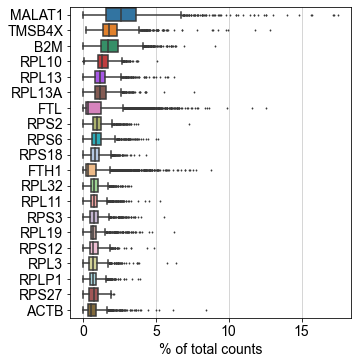

In [12]:
# The n_top genes with the highest mean fraction over all cells 

sc.pl.highest_expr_genes(adata, n_top=20)

#### Section 3a : Populating obs and var dataframes with QC stats

In [13]:
adata_wQC = adata.copy()
sc.pp.calculate_qc_metrics(adata_wQC, percent_top=None, log1p=False, inplace=True)

In [14]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [15]:
# This dataframe now contains: 
#                    1) X matrix with n_obs × n_vars = 2700 × 32738
#                    2) obs: 'n_genes_by_counts', 'total_counts'
#                    3) var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

adata_wQC

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [16]:
# n_genes_by_counts - The number of genes with at least 1 count in a cell
# total_counts - Total number of counts for a cell

adata_wQC.obs

,n_genes_by_counts,total_counts
AAACATACAACCAC-1,781,2421.0
AAACATTGAGCTAC-1,1352,4903.0
AAACATTGATCAGC-1,1131,3149.0
AAACCGTGCTTCCG-1,960,2639.0
AAACCGTGTATGCG-1,522,981.0
...,...,...
TTTCGAACTCTCAT-1,1155,3461.0
TTTCTACTGAGGCA-1,1227,3447.0
TTTCTACTTCCTCG-1,622,1684.0
TTTGCATGAGAGGC-1,454,1024.0


In [56]:
adata_wQC.var

,gene_ids,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
MIR1302-10,ENSG00000243485,0,0.0,100.0,0.0
FAM138A,ENSG00000237613,0,0.0,100.0,0.0
OR4F5,ENSG00000186092,0,0.0,100.0,0.0
RP11-34P13.7,ENSG00000238009,0,0.0,100.0,0.0
RP11-34P13.8,ENSG00000239945,0,0.0,100.0,0.0
...,...,...,...,...,...
AC145205.1,ENSG00000215635,0,0.0,100.0,0.0
BAGE5,ENSG00000268590,0,0.0,100.0,0.0
CU459201.1,ENSG00000251180,0,0.0,100.0,0.0
AC002321.2,ENSG00000215616,0,0.0,100.0,0.0


#### Section 3b : Populating obs and var dataframes manually

In [17]:
adata_wQC.var_names

Index(['MIR1302-10', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'AL627309.1', 'RP11-34P13.14', 'RP11-34P13.9', 'AP006222.2',
       'RP4-669L17.10',
       ...
       'KIR3DL2-1', 'AL590523.1', 'CT476828.1', 'PNRC2-1', 'SRSF10-1',
       'AC145205.1', 'BAGE5', 'CU459201.1', 'AC002321.2', 'AC002321.1'],
      dtype='object', length=32738)

In [18]:
adata_wQC.var_names.str.startswith('MT-')

array([False, False, False, ..., False, False, False])

In [20]:
# annotate mitochondrial genes as 'mt' and calculate qc metrics
adata_wQC.var['mt'] = adata_wQC.var_names.str.startswith('MT-') # creates a new column in var dataframe with boolean values for gene names that start with MT
adata_wQC

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'

In [21]:
# print mt column
adata_wQC.var['mt']

MIR1302-10      False
FAM138A         False
OR4F5           False
RP11-34P13.7    False
RP11-34P13.8    False
                ...  
AC145205.1      False
BAGE5           False
CU459201.1      False
AC002321.2      False
AC002321.1      False
Name: mt, Length: 32738, dtype: bool

In [22]:
# print var dataframe columns
adata_wQC.var

,gene_ids,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,mt
MIR1302-10,ENSG00000243485,0,0.0,100.0,0.0,False
FAM138A,ENSG00000237613,0,0.0,100.0,0.0,False
OR4F5,ENSG00000186092,0,0.0,100.0,0.0,False
RP11-34P13.7,ENSG00000238009,0,0.0,100.0,0.0,False
RP11-34P13.8,ENSG00000239945,0,0.0,100.0,0.0,False
...,...,...,...,...,...,...
AC145205.1,ENSG00000215635,0,0.0,100.0,0.0,False
BAGE5,ENSG00000268590,0,0.0,100.0,0.0,False
CU459201.1,ENSG00000251180,0,0.0,100.0,0.0,False
AC002321.2,ENSG00000215616,0,0.0,100.0,0.0,False


In [23]:
sc.pp.calculate_qc_metrics(adata_wQC, percent_top=None, log1p=False, inplace=True) #,

In [24]:
adata_wQC

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'

In [25]:
sc.pp.calculate_qc_metrics(adata_wQC, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True) #,

In [26]:
adata_wQC

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'

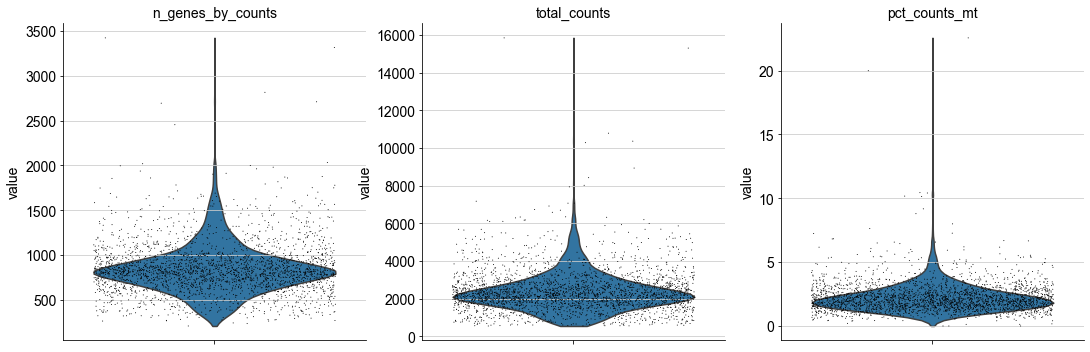

In [27]:
# plot a violin plot with some QC metrics
sc.pl.violin(adata_wQC, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

In [28]:
adata.obs.head()

""
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1


In [29]:
adata_wQC.obs.head()

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACATACAACCAC-1,781,2421.0,73.0,3.015283
AAACATTGAGCTAC-1,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,3149.0,28.0,0.889171
AAACCGTGCTTCCG-1,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,981.0,12.0,1.223242


In [30]:
# Print a summary of the AnnData.var dataframe
print(adata_wQC.obs.info())
print('')
print('##########################################')
print('')
print(adata_wQC.var.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2700 entries, AAACATACAACCAC-1 to TTTGCATGCCTCAC-1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   n_genes_by_counts  2700 non-null   int32  
 1   total_counts       2700 non-null   float32
 2   total_counts_mt    2700 non-null   float32
 3   pct_counts_mt      2700 non-null   float32
dtypes: float32(3), int32(1)
memory usage: 127.8+ KB
None

##########################################

<class 'pandas.core.frame.DataFrame'>
Index: 32738 entries, MIR1302-10 to AC002321.1
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gene_ids               32738 non-null  object 
 1   n_cells_by_counts      32738 non-null  int64  
 2   mean_counts            32738 non-null  float32
 3   pct_dropout_by_counts  32738 non-null  float64
 4   total_counts           32738 non-null  float32


In [85]:
#help(sc.pp.calculate_qc_metrics)

### Section 4: Filtering cells and genes

#### Section 4a: Filtering cells with < 200 genes

In [32]:
adata_wQC_filt = adata_wQC
sc.pp.filter_cells(adata_wQC_filt, min_genes=200)
adata_wQC_filt

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'

#### Section 4b: Genes that are expressed in less than “X” cells

In [33]:
sc.pp.filter_genes(adata_wQC_filt, min_cells=3)
print(adata_wQC)
print(adata_wQC_filt)

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'
AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'


In [90]:
adata_wQC_filt.var

,gene_ids,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,mt,n_cells
AL627309.1,ENSG00000237683,9,0.003333,99.666667,9.0,False,9
AP006222.2,ENSG00000228463,3,0.001111,99.888889,3.0,False,3
RP11-206L10.2,ENSG00000228327,5,0.001852,99.814815,5.0,False,5
RP11-206L10.9,ENSG00000237491,3,0.001111,99.888889,3.0,False,3
LINC00115,ENSG00000225880,18,0.006667,99.333333,18.0,False,18
...,...,...,...,...,...,...,...
AC145212.1,ENSG00000215750,16,0.006667,99.407407,18.0,False,16
AL592183.1,ENSG00000220023,323,0.134815,88.037037,364.0,False,323
AL354822.1,ENSG00000215615,8,0.002963,99.703704,8.0,False,8
PNRC2-1,ENSG00000215700,110,0.042963,95.925926,116.0,False,110


### Section 5: Normalization

In [34]:
norm_data = adata_wQC_filt

# normalize counts to 10,000 reads per cell
sc.pp.normalize_total(norm_data, target_sum=1e4)
norm_data

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'

In [35]:
#log n+1 transform
sc.pp.log1p(norm_data)

In [36]:
norm_data

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'
    uns: 'log1p'

In [37]:
norm_data.uns

OverloadedDict, wrapping:
	OrderedDict([('log1p', {'base': None})])
With overloaded keys:
	['neighbors'].

In [38]:
norm_data.uns['log1p']

{'base': None}

In [39]:
# identify highly variable genes
#help(sc.pp.highly_variable_genes)
sc.pp.highly_variable_genes(norm_data, n_top_genes=4000)
#sc.pp.highly_variable_genes(norm_data, n_top_genes=4000, layer="counts", flavor="seurat_v3" )

In [40]:
norm_data

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [41]:
norm_data.uns

OverloadedDict, wrapping:
	OrderedDict([('log1p', {'base': None}), ('hvg', {'flavor': 'seurat'})])
With overloaded keys:
	['neighbors'].

### Section 6: Finding Highly variable genes

In [43]:
HVG_data = norm_data.copy()
#filter to only include HVGs
HVG_data.raw = HVG_data # freeze state of HVG_data by saving as raw attribute
HVG_data = HVG_data[:, HVG_data.var.highly_variable].copy()

In [44]:
print(norm_data)
print("#######################################")
print(HVG_data)

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
#######################################
AnnData object with n_obs × n_vars = 2700 × 4000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'


In [107]:
HVG_data.uns['log1p']

{'base': None}

In [109]:
HVG_data.uns['hvg']

{'flavor': 'seurat'}

### Section 7: Scaling the data

In [46]:
pcHVG_data = HVG_data.copy()
#scale to unit variance for PCA, clip values exceding var 10
sc.pp.scale(pcHVG_data, max_value=10)

In [47]:
print(HVG_data)
print(pcHVG_data)

AnnData object with n_obs × n_vars = 2700 × 4000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
AnnData object with n_obs × n_vars = 2700 × 4000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'


### Section 8: Perform PCA

In [48]:
sc.tl.pca(pcHVG_data)

In [49]:
print(pcHVG_data)

AnnData object with n_obs × n_vars = 2700 × 4000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'


In [117]:
pcHVG_data.uns['log1p']

{'base': None}

In [118]:
pcHVG_data.uns['hvg']

{'flavor': 'seurat'}

In [116]:
pcHVG_data.uns['pca']

{'params': {'zero_center': True, 'use_highly_variable': True},
 'variance': array([59.07857  , 29.192837 , 20.505127 , 19.913877 , 13.975718 ,
         8.143864 ,  6.0871806,  5.586012 ,  5.0385623,  4.9421887,
         4.560308 ,  4.536615 ,  4.420329 ,  4.328834 ,  4.3070846,
         4.1910553,  4.143069 ,  4.08774  ,  4.07924  ,  4.054018 ,
         4.033353 ,  4.0148263,  4.003675 ,  3.988926 ,  3.9848216,
         3.9773893,  3.954    ,  3.9429932,  3.927587 ,  3.9072323,
         3.893893 ,  3.8911047,  3.8843768,  3.8766813,  3.8654687,
         3.8575692,  3.8456488,  3.839046 ,  3.8246264,  3.8195994,
         3.810368 ,  3.8057752,  3.7891302,  3.7813492,  3.7794983,
         3.768635 ,  3.760048 ,  3.747981 ,  3.7378843,  3.730991 ],
       dtype=float32),
 'variance_ratio': array([0.01856284, 0.00917256, 0.00644283, 0.00625706, 0.00439125,
        0.00255885, 0.00191263, 0.00175516, 0.00158315, 0.00155287,
        0.00143288, 0.00142543, 0.00138889, 0.00136015, 0.00135331,

In [123]:
print(pcHVG_data.uns['pca'].keys())
#print(type(pcHVG_data.uns['pca']))

dict_keys(['params', 'variance', 'variance_ratio'])


In [125]:
pcHVG_data.uns['pca']['params']

{'zero_center': True, 'use_highly_variable': True}

In [124]:
pcHVG_data.uns['pca']['variance']

array([59.07857  , 29.192837 , 20.505127 , 19.913877 , 13.975718 ,
        8.143864 ,  6.0871806,  5.586012 ,  5.0385623,  4.9421887,
        4.560308 ,  4.536615 ,  4.420329 ,  4.328834 ,  4.3070846,
        4.1910553,  4.143069 ,  4.08774  ,  4.07924  ,  4.054018 ,
        4.033353 ,  4.0148263,  4.003675 ,  3.988926 ,  3.9848216,
        3.9773893,  3.954    ,  3.9429932,  3.927587 ,  3.9072323,
        3.893893 ,  3.8911047,  3.8843768,  3.8766813,  3.8654687,
        3.8575692,  3.8456488,  3.839046 ,  3.8246264,  3.8195994,
        3.810368 ,  3.8057752,  3.7891302,  3.7813492,  3.7794983,
        3.768635 ,  3.760048 ,  3.747981 ,  3.7378843,  3.730991 ],
      dtype=float32)

In [152]:
print(pcHVG_data)

AnnData object with n_obs × n_vars = 2700 × 4000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'


In [175]:
# Performing PCA on AnnData object resulted in matrix of PC's stored in the obsm under the 'X_pca' key. 

# Advantages of obsm matrix: 
# - keeps the original data stored in the X matrix in the AnnData object intact.
# - also allows us to access the transformed data.

# The X_pca key in the obsm matrix has same number of rows as the original data matrix (X), 
# but with fewer columns, where each column represents a principal component and 
# the columns are ordered by the amount of variance they explain.

pcHVG_data.obsm.to_df()

,X_pca1,X_pca2,X_pca3,X_pca4,X_pca5,X_pca6,X_pca7,X_pca8,X_pca9,X_pca10,...,X_pca43,X_pca44,X_pca45,X_pca46,X_pca47,X_pca48,X_pca49,X_pca50,X_umap1,X_umap2
AAACATACAACCAC-1,-5.477530,0.715857,-2.960063,0.633411,1.318296,-0.074125,-1.486689,-1.352830,1.634555,2.219655,...,-1.738760,1.784545,3.426666,0.360400,0.503728,-1.503804,-2.738533,0.122488,-1.541273,5.418859
AAACATTGAGCTAC-1,-0.820331,-4.702875,11.032924,-2.500843,3.237437,2.677763,-2.952067,0.112239,0.480042,-0.911582,...,0.399727,-2.678752,-0.970847,4.928336,-5.920250,0.073277,0.791851,-3.349849,2.913537,-3.763874
AAACATTGATCAGC-1,-2.573961,4.108792,-2.498273,-0.322534,5.859278,0.857805,-0.658636,-2.511125,-2.916985,0.102671,...,-3.622578,0.020767,-1.230849,3.851016,2.569130,-1.998992,-0.308600,1.198592,0.133103,4.117806
AAACCGTGCTTCCG-1,14.516243,0.169565,-0.118788,-0.798527,1.718221,-3.389217,-0.790791,1.324942,-1.009531,-1.546413,...,-1.088963,-0.782975,-0.566288,-0.265570,1.749574,-0.006723,-1.364727,-1.237275,14.170448,7.506547
AAACCGTGTATGCG-1,-0.938967,9.569853,5.534804,0.385296,-9.667472,-0.109913,5.885808,3.633748,-4.835961,-0.906669,...,-4.972777,-4.369856,-2.144444,-0.679863,-0.946739,-0.115438,-1.786590,-3.133774,-3.011772,8.460660


In [174]:
pcHVG_data.varm.to_df().head()

,PCs1,PCs2,PCs3,PCs4,PCs5,PCs6,PCs7,PCs8,PCs9,PCs10,...,PCs41,PCs42,PCs43,PCs44,PCs45,PCs46,PCs47,PCs48,PCs49,PCs50
ISG15,0.053727,0.022210,-0.001733,-2.318774e-02,0.020849,-0.010598,0.008700,-0.012328,-0.050047,-0.018530,...,-0.005327,0.030692,-0.006025,0.029539,-0.044226,-0.001523,-0.000419,0.007766,-0.004751,0.010584
AGRN,0.005227,-0.000743,-0.000993,-1.347366e-03,-0.003032,0.010725,-0.002312,-0.000986,0.006174,-0.003950,...,0.000603,0.009026,-0.001763,-0.009178,0.015277,-0.000957,0.013917,-0.001940,0.000806,-0.004886
TNFRSF18,-0.010687,0.023001,0.004487,-7.977050e-03,0.009476,0.018253,0.009051,-0.041630,-0.031039,0.024178,...,0.018612,-0.025120,-0.005118,0.026357,0.017693,0.010709,0.002404,-0.005661,-0.000502,-0.014922
TNFRSF4,-0.016552,0.011639,-0.024095,-1.610899e-03,0.031614,0.014386,-0.003328,-0.045388,-0.089023,-0.010078,...,0.026440,-0.004436,-0.000299,-0.006095,0.029451,-0.005936,-0.001998,-0.021159,-0.030173,-0.015996
FAM132A,0.000198,0.000823,-0.000944,6.204723e-07,-0.001018,0.000746,-0.006141,-0.000958,0.005005,0.000591,...,0.000123,-0.001001,0.004343,-0.000929,0.003103,-0.007054,-0.002334,0.003393,0.001328,0.003789


### Section 9: Finding Neighbors

In [159]:
sc.pp.neighbors(pcHVG_data)

In [160]:
pcHVG_data

AnnData object with n_obs × n_vars = 2700 × 4000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [161]:
pcHVG_data.obsp

PairwiseArrays with keys: distances, connectivities

In [163]:
type(pcHVG_data.obsp)

anndata._core.aligned_mapping.PairwiseArrays

In [168]:
# obsp attribute contains two keys: 'distances' and 'connectivities', each key has a value that is a sparse matrix.

for key, value in pcHVG_data.obsp.items():
    print("key: ", key)
    print("value: ", value)

key:  distances
value:    (0, 37)	11.866178512573242
  (0, 487)	11.862650871276855
  (0, 597)	11.841341018676758
  (0, 890)	11.499669075012207
  (0, 1171)	10.900457382202148
  (0, 1465)	11.961982727050781
  (0, 1692)	11.22607421875
  (0, 1891)	11.810883522033691
  (0, 2021)	11.330179214477539
  (0, 2058)	11.813911437988281
  (0, 2395)	11.892126083374023
  (0, 2511)	11.801128387451172
  (0, 2520)	11.940055847167969
  (0, 2555)	11.621065139770508
  (1, 10)	17.03321647644043
  (1, 108)	18.16880226135254
  (1, 164)	18.219032287597656
  (1, 281)	14.332503318786621
  (1, 304)	17.51382827758789
  (1, 660)	17.9306583404541
  (1, 713)	18.41547203063965
  (1, 942)	16.022937774658203
  (1, 1224)	17.789297103881836
  (1, 1228)	17.202999114990234
  (1, 1674)	18.083696365356445
  :	:
  (2698, 1310)	16.635910034179688
  (2698, 1494)	16.53990364074707
  (2698, 1521)	16.526737213134766
  (2698, 1577)	17.525169372558594
  (2698, 1781)	16.902694702148438
  (2698, 1938)	15.962621688842773
  (2698, 2042)	1

In [167]:
print(pcHVG_data.obsp['distances'].toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Section 10: Run UMAP

In [169]:
umHVG_data = pcHVG_data
sc.tl.umap(umHVG_data)

In [170]:
umHVG_data

AnnData object with n_obs × n_vars = 2700 × 4000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [178]:
print(umHVG_data.obsm['X_pca'])

[[-5.47753     0.7158567  -2.9600632  ... -1.5038038  -2.7385328
   0.12248797]
 [-0.82033086 -4.7028747  11.032924   ...  0.07327716  0.7918507
  -3.3498495 ]
 [-2.5739615   4.1087923  -2.4982727  ... -1.9989923  -0.30860007
   1.1985921 ]
 ...
 [-2.9033778  -9.763722    6.617561   ...  1.6098499   0.10079659
   1.9579117 ]
 [-2.3268554  -7.4409957   7.4637585  ... -0.6684238   2.962389
  -3.2557528 ]
 [-4.099712   -1.915916   -4.141136   ...  0.80929923  0.42616582
   1.6284049 ]]


In [179]:
print(umHVG_data.obsm['X_umap'])

[[-1.5412725   5.4188585 ]
 [ 2.913537   -3.7638736 ]
 [ 0.13310283  4.1178064 ]
 ...
 [ 4.3411956  -4.016448  ]
 [ 4.582146   -3.3064363 ]
 [-3.1570594   3.1801198 ]]


### Section 11: UMAP visualization

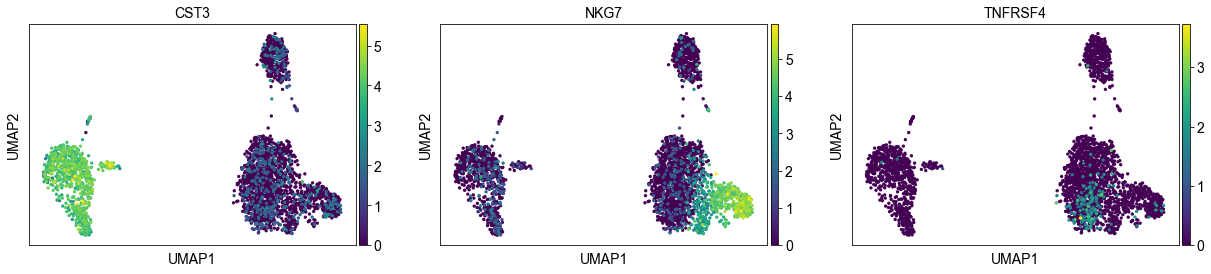

In [57]:
# the below command will use the data stored in the 'X_umap' by default. 
sc.pl.umap(pcHVG_data,color=['CST3', 'NKG7', 'TNFRSF4'])

### Resources

https://www.sc-best-practices.org/preamble.html

https://scanpy.readthedocs.io/en/stable/

https://nbisweden.github.io/workshop-scRNAseq/labs/compiled/scanpy/scanpy_01_qc.html

https://www.10xgenomics.com/resources/datasets